In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [ ]:
df789 = pd.read_csv("/content/processed (1).csv", sep=',', decimal= '.', encoding='latin-1')
df789.head()

,Unnamed: 0,customerid,bank_branch_clients,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,referred,...,employment_status_client_Self-Employed,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0,8a858e135cb22031015cbafc76964ebd,0.0,301964962.0,2.0,10000.0,13000.0,30.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,10000.0,3.667000e+12,1.300528e+15,1500.0,0.0
1,1,8a858e275c7ea5ec015c82482d7c3996,0.0,301972172.0,2.0,10000.0,13000.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10000.0,3.668000e+12,2.840792e+15,3000.0,1.0
2,2,8a858e5b5bd99460015bdc95cd485634,0.0,301976271.0,4.0,10000.0,13000.0,30.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3.0,30000.0,1.083500e+13,5.520142e+15,6000.0,1.0
3,3,8a858efd5ca70688015cabd1f1e94b55,0.0,301997763.0,2.0,10000.0,11500.0,15.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10000.0,3.668000e+12,2.873995e+15,1500.0,1.0
4,4,8a858ea05a859123015a8892914d15b7,0.0,301992494.0,6.0,20000.0,24500.0,30.0,1.0,0.0,...,0.0,0.0,0.0,0.0,5.0,70000.0,1.809800e+13,1.179669e+16,18000.0,0.0


In [ ]:
df78= df789.drop(['customerid', 'systemloanid'], axis=1)

In [ ]:
df7 = df78.loc[:, ~df78.columns.str.contains('^Unnamed')]

In [ ]:
df= df7.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 0 to 3276
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bank_branch_clients                       3272 non-null   float64
 1   loannumber                                3272 non-null   float64
 2   loanamount                                3272 non-null   float64
 3   totaldue                                  3272 non-null   float64
 4   termdays                                  3272 non-null   float64
 5   good_bad_flag                             3272 non-null   float64
 6   referred                                  3272 non-null   float64
 7   realage                                   3272 non-null   float64
 8   TipoInteresAhora                          3272 non-null   float64
 9   bank_account_Current                      3272 non-null   float64
 10  bank_account_Other                  

**SLIPT DATA**

In [ ]:
dep_var = "good_bad_flag" #target varaible
cond = np.random.rand(len(df))>.2 #número de lineas randome de nuestro data set 80% sera 1, otro 0
train = np.where(cond)[0] #training at 80%
valid = np.where(~cond)[0] #validation at 20%
len(train), len(valid)    #check size

(2623, 649)

In [ ]:
train_df = df.iloc[train]  #get training dataframe
valid_df = df.iloc[valid]  #get validation dataframe
len(train_df), len(valid_df)   #check size

(2623, 649)

In [ ]:
train_y = train_df["good_bad_flag"]   #pull out target var
train_xs = train_df.drop(["good_bad_flag"], axis=1)   # drop target var from training data

In [ ]:
valid_y = valid_df["good_bad_flag"]  #pull out target variable
valid_xs = valid_df.drop(["good_bad_flag"], axis=1)   #drop target var from valid data

**TRAIN MODEL**

In [ ]:
#TRAIN MODEL
m = KNeighborsClassifier()
m = m.fit(train_xs,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


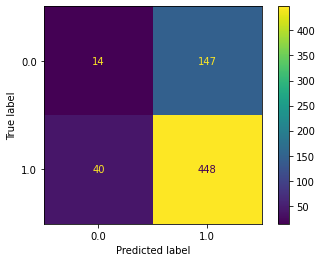

In [ ]:
plot_confusion_matrix(estimator=m,X=valid_xs, y_true=valid_y)

In [ ]:
std_score = m.score(valid_xs,valid_y)
std_score


0.711864406779661

In [ ]:
data = {'bank_branch_clients':[0], 'loannumber':[0], 'loanamount':[0], 'totaldue':[0], 'termdays':[0], 'referred':[0], 'realage':[0], 'TipoInteresAhora':[0], 'bank_account_Current':[0], 'bank_account_Other':[0], 'bank_account_Savings':[0], 'level_of_education_clients_Graduate':[0], 'level_of_education_Post-Graduate':[0], 'level_of_education_clients_Primary':[0], 'level_of_educationclients_Secondary':[0], 'level_of_education_clients_Unknown':[0], 'bank_name_client_Access Bank':[0], 'bank_name_client_Diamond Bank':[0], 'bank_name_client_EcoBank':[0], 'bank_name_client_FCMB':[0], 'bank_name_client_Fidelity Bank':[0], 'bank_name_client_First Bank':[0], 'bank_name_client_GT Bank':[0], 'bank_name_client_Heritage Bank':[0], 'bank_name_client_Keystone Bank':[0],'bank_name_client_Skye Bank':[0], 'bank_name_client_Stanbic IBTC':[0], 'bank_name_client_Standard Chartered':[0], 'bank_name_client_Sterling Bank':[0], 'bank_name_client_UBA':[0], 'bank_name_client_Union Bank':[0], 'bank_name_client_Unity Bank':[0], 'bank_name_client_Wema Bank':[0], 'bank_name_client_Zenith Bank':[0],'employment_status_client_Contract':[0], 'employment_status_client_Permanent':[0], 'employment_status_client_Retired':[0], 'employment_status_client_Self-Employed':[0], 'employment_status_client_Student':[0], 'employment_status_client_Unemployed':[0], 'employment_status_client_Unknown':[0], 'number_of_Loans':[0], 'accumlated_loan_given':[0], 'accumlated_timediff':[0], 'first-repay':[0], 'time-to-payoff':[0], 'accumulated_money_won':[0], 'is_late_for_firstpay':[0]}
feat_imp = pd.DataFrame(data)
feat_imp.head()   

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


bank_branch_clients

In [ ]:
valid_BBRC = valid_xs.copy()
valid_BBRC['bank_branch_clients'] = np.random.permutation(valid_BBRC['bank_branch_clients'])
m.score(valid_BBRC, valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_branch_clients'] = std_score - m.score(valid_BBRC,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


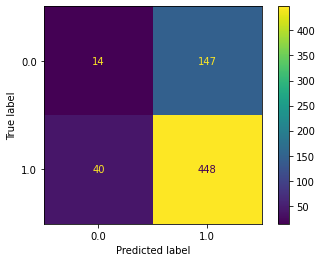

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BBRC, y_true=valid_y)

loannumber

In [ ]:
valid_LN = valid_xs.copy()
valid_LN['loannumber'] = np.random.permutation(valid_LN['loannumber'])
m.score(valid_LN, valid_y)

0.711864406779661

In [ ]:
feat_imp['loannumber'] = std_score - m.score(valid_LN,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


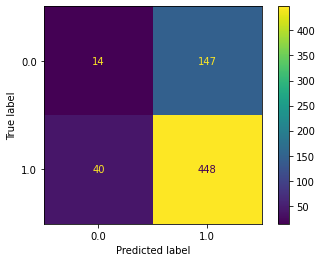

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_LN, y_true=valid_y)

loanamount

In [ ]:
valid_LA = valid_xs.copy()
valid_LA['loanamount'] = np.random.permutation(valid_LA['loanamount'])
m.score(valid_LA, valid_y)

0.711864406779661

In [ ]:
feat_imp['loanamount'] = std_score - m.score(valid_LA,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


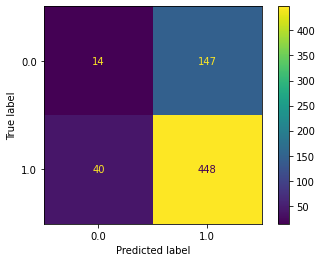

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_LA, y_true=valid_y)

totaldue

In [ ]:
valid_TD = valid_xs.copy()
valid_TD['totaldue'] = np.random.permutation(valid_TD['totaldue'])
m.score(valid_TD, valid_y)

0.711864406779661

In [ ]:
feat_imp['totaldue'] = std_score - m.score(valid_TD,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


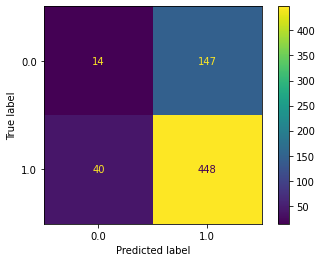

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_TD, y_true=valid_y)

termdays

In [ ]:
valid_TermD = valid_xs.copy()
valid_TermD ['termdays'] = np.random.permutation(valid_TermD ['termdays'])
m.score(valid_TermD , valid_y)

0.711864406779661

In [ ]:
feat_imp['termdays'] = std_score - m.score(valid_TermD,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


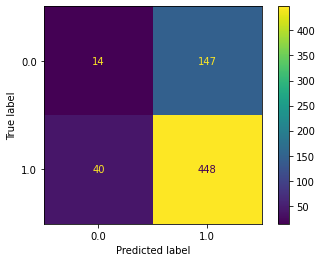

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_TermD , y_true=valid_y)

referred

In [ ]:
valid_ref = valid_xs.copy()
valid_ref['referred'] = np.random.permutation(valid_ref ['referred'])
m.score(valid_ref, valid_y)

0.711864406779661

In [ ]:
feat_imp['referred'] = std_score - m.score(valid_ref,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


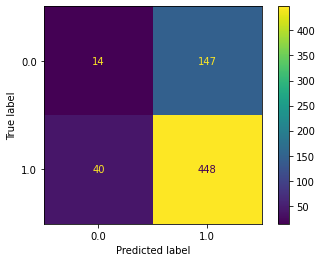

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ref , y_true=valid_y)

realage

In [ ]:
valid_RA = valid_xs.copy()
valid_RA['realage'] = np.random.permutation(valid_RA ['realage'])
m.score(valid_RA, valid_y)

0.711864406779661

In [ ]:
feat_imp['realage'] = std_score - m.score(valid_RA,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


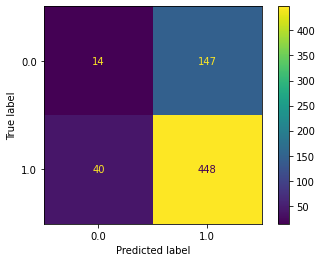

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_RA , y_true=valid_y)

TipoInteresAhora

In [ ]:
valid_TIA = valid_xs.copy()
valid_TIA['TipoInteresAhora'] = np.random.permutation(valid_TIA['TipoInteresAhora'])
m.score(valid_TIA, valid_y)

0.711864406779661

In [ ]:
feat_imp['TipoInteresAhora'] = std_score - m.score(valid_TIA,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


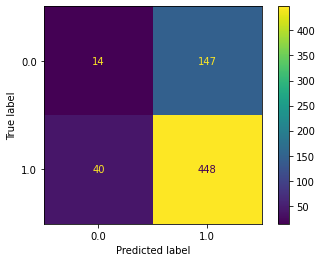

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_TIA , y_true=valid_y)

bank_account_Current

In [ ]:
valid_BAC = valid_xs.copy()
valid_BAC['bank_account_Current'] = np.random.permutation(valid_BAC['bank_account_Current'])
m.score(valid_BAC, valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_account_Current'] = std_score - m.score(valid_BAC,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


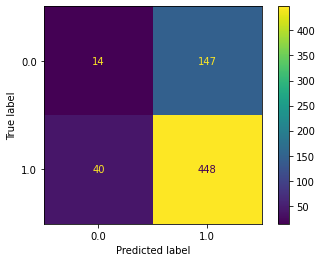

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BAC, y_true=valid_y)

bank_account_Other

In [ ]:
valid_BAO = valid_xs.copy()
valid_BAO['bank_account_Other'] = np.random.permutation(valid_BAO['bank_account_Other'])
m.score(valid_BAO, valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_account_Other'] = std_score - m.score(valid_BAO,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


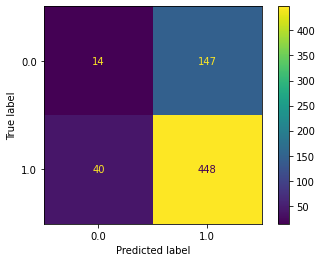

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BAO, y_true=valid_y)

bank_account_savings

In [ ]:
valid_BAS = valid_xs.copy()
valid_BAS['bank_account_Savings'] = np.random.permutation(valid_BAS['bank_account_Savings'])
m.score(valid_BAS, valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_account_Savings'] = std_score - m.score(valid_BAS,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


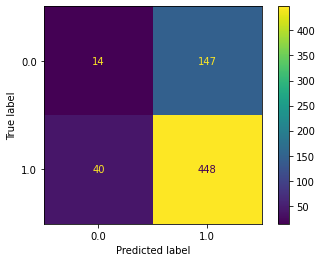

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BAS, y_true=valid_y)

level_of_education_clients_Graduate

In [ ]:
valid_LOECG = valid_xs.copy()
valid_LOECG['level_of_education_clients_Graduate'] = np.random.permutation(valid_LOECG['level_of_education_clients_Graduate'])
m.score(valid_LOECG, valid_y)

0.711864406779661

In [ ]:
feat_imp['level_of_education_clients_Graduate'] = std_score - m.score(valid_LOECG,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Student,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


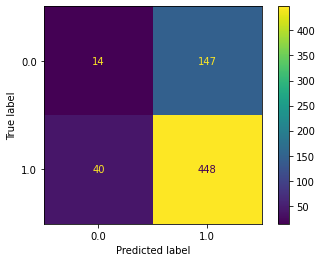

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_LOECG, y_true=valid_y)

level_of_education_PostGraduate

In [ ]:
valid_LOECPG = valid_xs.copy()
valid_LOECPG ['level_of_education_clients_Post-Graduate'] = np.random.permutation(valid_LOECPG ['level_of_education_clients_Post-Graduate'])
m.score(valid_LOECPG , valid_y)

0.711864406779661

In [ ]:
feat_imp['level_of_education_clients_Post-Graduate'] = std_score - m.score(valid_LOECPG,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


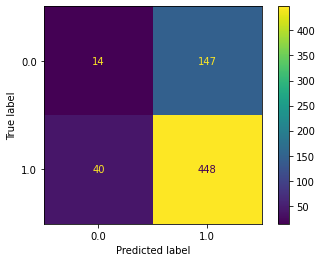

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_LOECPG , y_true=valid_y)

level_of_education_clients_Primary

In [ ]:
valid_LOECP = valid_xs.copy()
valid_LOECP ['level_of_education_clients_Primary'] = np.random.permutation(valid_LOECP ['level_of_education_clients_Primary'])
m.score(valid_LOECP , valid_y)

0.711864406779661

In [ ]:
feat_imp['level_of_education_clients_Primary'] = std_score - m.score(valid_LOECP,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unemployed,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


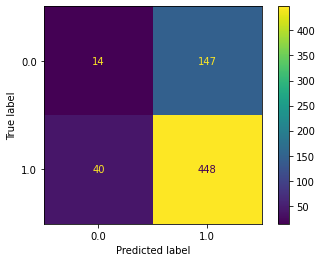

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_LOECP , y_true=valid_y)

level_of_educationclients_Secondary

In [ ]:
valid_LOECS = valid_xs.copy()
valid_LOECS ['level_of_education_clients_Secondary'] = np.random.permutation(valid_LOECS ['level_of_education_clients_Secondary'])
m.score(valid_LOECS , valid_y)

0.711864406779661

In [ ]:
feat_imp['level_of_education_clients_Secondary'] = std_score - m.score(valid_LOECS,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


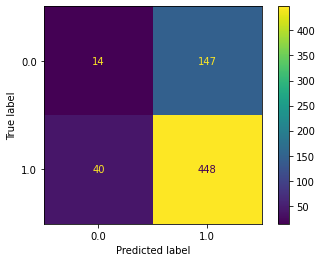

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_LOECS , y_true=valid_y)

level_of_education_clients_Unknown

In [ ]:
valid_LOECU = valid_xs.copy()
valid_LOECU ['level_of_education_clients_Unknown'] = np.random.permutation(valid_LOECU ['level_of_education_clients_Unknown'])
m.score(valid_LOECU , valid_y)

0.711864406779661

In [ ]:
feat_imp['level_of_education_clients_Unknown'] = std_score - m.score(valid_LOECU,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


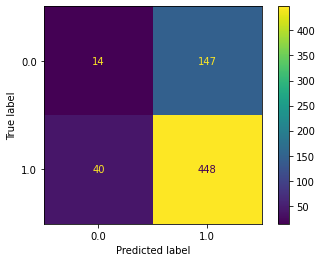

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_LOECU , y_true=valid_y)

bank_name_client_Access Bank

In [ ]:
valid_BNAB = valid_xs.copy()
valid_BNAB  ['bank_name_client_Access Bank'] = np.random.permutation(valid_BNAB  ['bank_name_client_Access Bank'])
m.score(valid_BNAB , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_Access Bank'] = std_score - m.score(valid_BNAB,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


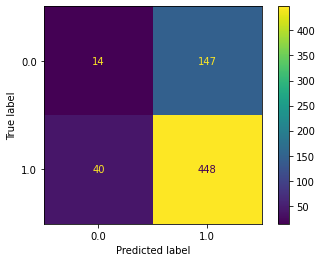

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNAB  , y_true=valid_y)

bank_name_client_Diamond Bank

In [ ]:
valid_BNCDB = valid_xs.copy()
valid_BNCDB['bank_name_client_Diamond Bank'] = np.random.permutation(valid_BNCDB['bank_name_client_Diamond Bank'])
m.score(valid_BNCDB , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_Diamond Bank'] = std_score - m.score(valid_BNCDB,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


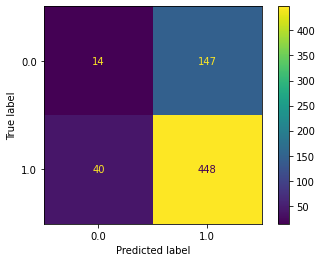

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCDB  , y_true=valid_y)

bank_name_client_EcoBank


In [ ]:
valid_BNCEco = valid_xs.copy()
valid_BNCEco['bank_name_client_EcoBank'] = np.random.permutation(valid_BNCEco['bank_name_client_Diamond Bank'])
m.score(valid_BNCEco , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_EcoBank'] = std_score - m.score(valid_BNCEco,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


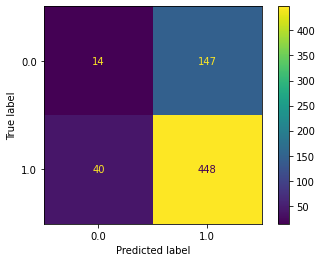

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCEco  , y_true=valid_y)

bank_name_client_FCMB

In [ ]:
valid_BNCFCMB = valid_xs.copy()
valid_BNCFCMB ['bank_name_client_FCMB'] = np.random.permutation(valid_BNCFCMB ['bank_name_client_FCMB'])
m.score(valid_BNCFCMB  , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_FCMB'] = std_score - m.score(valid_BNCFCMB ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


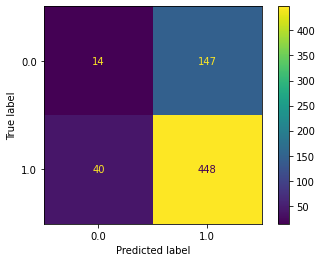

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCFCMB   , y_true=valid_y)

bank_name_client_Fidelity Bank

In [ ]:
valid_BNCFiB = valid_xs.copy()
valid_BNCFiB ['bank_name_client_Fidelity Bank'] = np.random.permutation(valid_BNCFiB ['bank_name_client_Fidelity Bank'])
m.score(valid_BNCFiB  , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_Fidelity Bank'] = std_score - m.score(valid_BNCFiB ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


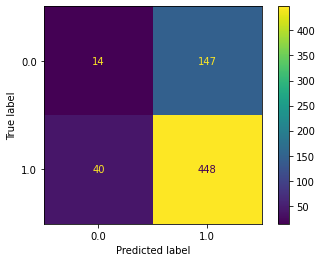

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCFiB   , y_true=valid_y)

bank_name_client_First Bank

In [ ]:
valid_BNCfstB = valid_xs.copy()
valid_BNCfstB ['bank_name_client_First Bank'] = np.random.permutation(valid_BNCfstB ['bank_name_client_First Bank'])
m.score(valid_BNCfstB  , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_First Bank'] = std_score - m.score(valid_BNCfstB ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


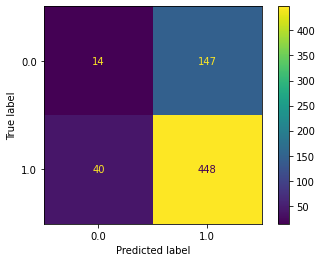

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCfstB   , y_true=valid_y)

bank_name_client_GT Bank

In [ ]:
valid_BNCGTB = valid_xs.copy()
valid_BNCGTB ['bank_name_client_GT Bank'] = np.random.permutation(valid_BNCGTB ['bank_name_client_GT Bank'])
m.score(valid_BNCGTB  , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_GT Bank'] = std_score - m.score(valid_BNCGTB,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


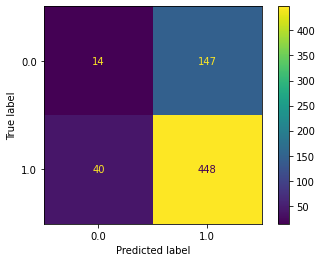

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCGTB   , y_true=valid_y)

bank_name_client_Heritage Bank

In [ ]:
valid_BNCHB = valid_xs.copy()
valid_BNCHB ['bank_name_client_Heritage Bank'] = np.random.permutation(valid_BNCHB ['bank_name_client_Heritage Bank'])
m.score(valid_BNCHB , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_Heritage Bank'] = std_score - m.score(valid_BNCHB,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


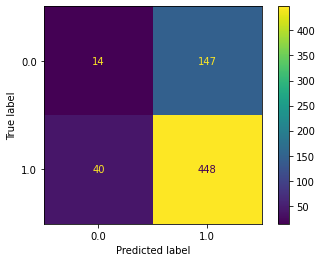

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCHB   , y_true=valid_y)

bank_name_client_Keystone Bank

In [ ]:
valid_BNCKB = valid_xs.copy()
valid_BNCKB ['bank_name_client_Keystone Bank'] = np.random.permutation(valid_BNCKB ['bank_name_client_Keystone Bank'])
m.score(valid_BNCKB , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_Keystone Bank'] = std_score - m.score(valid_BNCKB,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


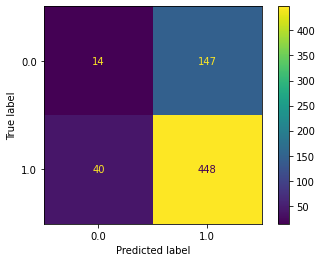

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCKB  , y_true=valid_y)

'bank_name_client_Skye Bank'

In [ ]:
valid_BNCSB = valid_xs.copy()
valid_BNCSB['bank_name_client_Skye Bank'] = np.random.permutation(valid_BNCKB ['bank_name_client_Skye Bank'])
m.score(valid_BNCSB , valid_y)

0.711864406779661

In [ ]:
feat_imp['bank_name_client_Skye Bank'] = std_score - m.score(valid_BNCSB,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


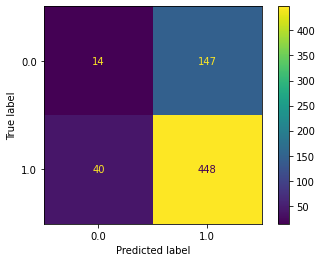

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCSB  , y_true=valid_y)

 'bank_name_client_Stanbic IBTC'

In [ ]:
valid_BNCIBTC = valid_xs.copy()
valid_BNCIBTC[ 'bank_name_client_Stanbic IBTC'] = np.random.permutation(valid_BNCIBTC[ 'bank_name_client_Stanbic IBTC'])
m.score(valid_BNCIBTC , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'bank_name_client_Stanbic IBTC'] = std_score - m.score(valid_BNCIBTC,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


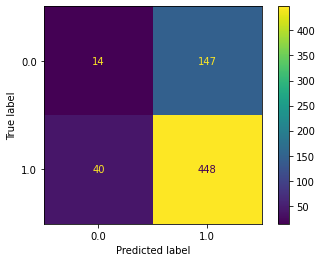

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCIBTC , y_true=valid_y)

bank_name_client_Standard Chartered

In [ ]:
valid_BNCStC = valid_xs.copy()
valid_BNCStC[ 'bank_name_client_Standard Chartered'] = np.random.permutation(valid_BNCStC[ 'bank_name_client_Standard Chartered'])
m.score(valid_BNCStC , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'bank_name_client_Standard Chartered'] = std_score - m.score(valid_BNCStC,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


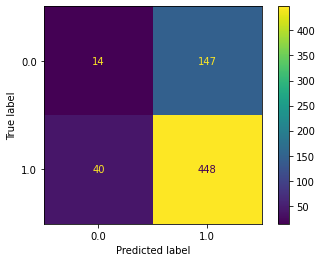

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCStC , y_true=valid_y)

bank_name_client_Sterling Bank

In [ ]:
valid_BNCSteB = valid_xs.copy()
valid_BNCSteB[ 'bank_name_client_Sterling Bank'] = np.random.permutation(valid_BNCSteB[ 'bank_name_client_Sterling Bank'])
m.score(valid_BNCSteB , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'bank_name_client_Sterling Bank'] = std_score - m.score(valid_BNCSteB,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


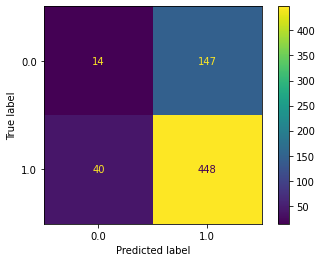

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCSteB , y_true=valid_y)

bank_name_client_UBA

In [ ]:
valid_BNCUBA = valid_xs.copy()
valid_BNCUBA [ 'bank_name_client_UBA'] = np.random.permutation(valid_BNCUBA [ 'bank_name_client_UBA'])
m.score(valid_BNCUBA  , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'bank_name_client_UBA'] = std_score - m.score(valid_BNCUBA ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


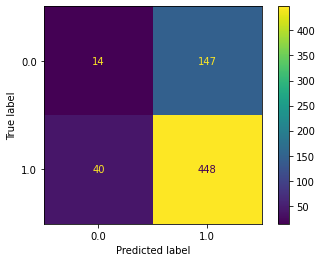

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCUBA , y_true=valid_y)

bank_name_client_Union Bank

In [ ]:
valid_BNCUnB = valid_xs.copy()
valid_BNCUnB [ 'bank_name_client_Union Bank'] = np.random.permutation(valid_BNCUnB [ 'bank_name_client_Union Bank'])
m.score(valid_BNCUnB  , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'bank_name_client_Union Bank'] = std_score - m.score(valid_BNCUnB ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


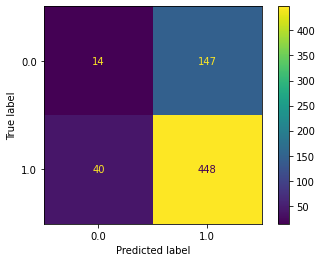

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCUnB , y_true=valid_y)

bank_name_client_Unity Bank

In [ ]:
valid_BNCUnIB = valid_xs.copy()
valid_BNCUnIB  [ 'bank_name_client_Unity Bank'] = np.random.permutation(valid_BNCUnIB [ 'bank_name_client_Unity Bank'])
m.score(valid_BNCUnIB, valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'bank_name_client_Unity Bank'] = std_score - m.score(valid_BNCUnIB ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


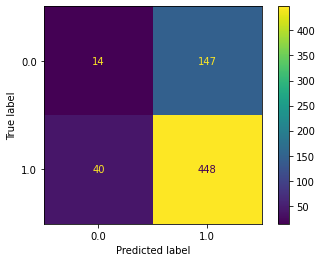

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCUnIB , y_true=valid_y)

bank_name_client_Wema Bank

In [ ]:
valid_BNCWB = valid_xs.copy()
valid_BNCWB [ 'bank_name_client_Wema Bank'] = np.random.permutation(valid_BNCWB [ 'bank_name_client_Wema Bank'])
m.score(valid_BNCWB , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'bank_name_client_Wema Bank'] = std_score - m.score(valid_BNCWB  ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


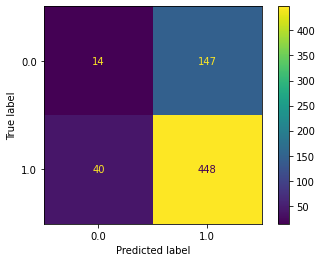

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCWB , y_true=valid_y)

bank_name_client_Zenith Bank

In [ ]:
valid_BNCZB = valid_xs.copy()
valid_BNCZB [ 'bank_name_client_Zenith Bank'] = np.random.permutation(valid_BNCZB [ 'bank_name_client_Zenith Bank'])
m.score(valid_BNCZB , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'bank_name_client_Zenith Bank'] = std_score - m.score(valid_BNCZB  ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


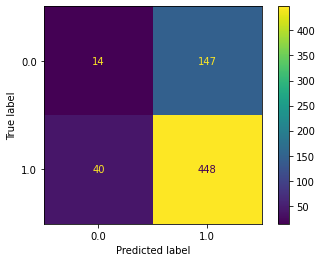

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_BNCZB , y_true=valid_y)

employment_status_client_Contract

In [ ]:
valid_ESCC = valid_xs.copy()
valid_ESCC [ 'employment_status_client_Contract'] = np.random.permutation(valid_ESCC[ 'employment_status_client_Contract'])
m.score(valid_ESCC, valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'employment_status_client_Contract'] = std_score - m.score(valid_ESCC,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


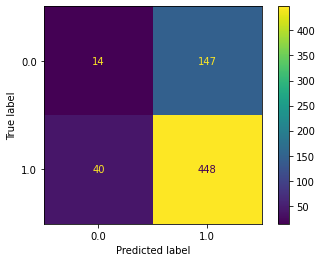

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ESCC, y_true=valid_y)

employment_status_client_Permanent

In [ ]:
valid_ESCP = valid_xs.copy()
valid_ESCP [ 'employment_status_client_Permanent'] = np.random.permutation(valid_ESCP[ 'employment_status_client_Permanent'])
m.score(valid_ESCP, valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'employment_status_client_Permanent'] = std_score - m.score(valid_ESCP,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


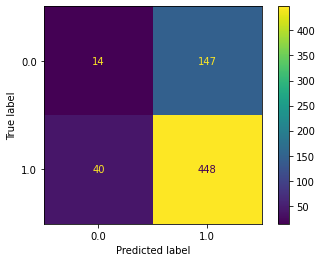

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ESCP, y_true=valid_y)

employment_status_client_Retired

In [ ]:
valid_ESCR = valid_xs.copy()
valid_ESCR [ 'employment_status_client_Retired'] = np.random.permutation(valid_ESCR[ 'employment_status_client_Retired'])
m.score(valid_ESCR, valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'employment_status_client_Retired'] = std_score - m.score(valid_ESCR,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


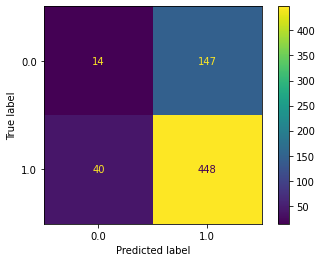

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ESCR, y_true=valid_y)

employment_status_client_Self-Employed

In [ ]:
valid_ESCSE = valid_xs.copy()
valid_ESCSE[ 'employment_status_client_Self-Employed'] = np.random.permutation(valid_ESCSE[ 'employment_status_client_Self-Employed'])
m.score(valid_ESCSE, valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'employment_status_client_Self-Employed'] = std_score - m.score(valid_ESCSE,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


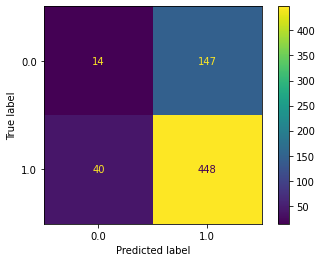

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ESCSE, y_true=valid_y)

employment_status_client_Student

In [ ]:
valid_ESCSt = valid_xs.copy()
valid_ESCSt[ 'employment_status_client_Student'] = np.random.permutation(valid_ESCSt[ 'employment_status_client_Student'])
m.score(valid_ESCSt, valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'employment_status_client_Student'] = std_score - m.score(valid_ESCSt,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


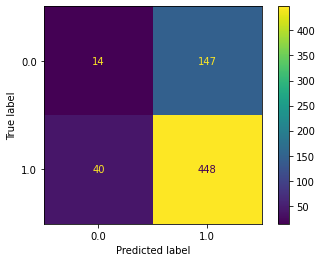

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ESCSt, y_true=valid_y)

employment_status_client_Unemployed

In [ ]:
valid_ESCU = valid_xs.copy()
valid_ESCU [ 'employment_status_client_Unemployed'] = np.random.permutation(valid_ESCU [ 'employment_status_client_Unemployed'])
m.score(valid_ESCU , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'employment_status_client_Unemployed'] = std_score - m.score(valid_ESCU ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


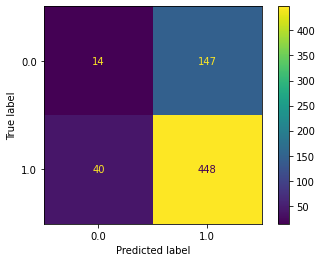

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ESCU , y_true=valid_y)

employment_status_client_Unknown

In [ ]:
valid_ESCUk = valid_xs.copy()
valid_ESCUk [ 'employment_status_client_Unknown'] = np.random.permutation(valid_ESCUk [ 'employment_status_client_Unknown'])
m.score(valid_ESCUk , valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'employment_status_client_Unknown'] = std_score - m.score(valid_ESCUk ,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


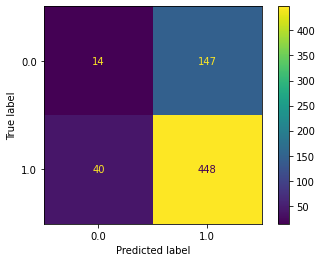

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ESCUk , y_true=valid_y)

number_of_Loans



In [ ]:
valid_nol = valid_xs.copy()
valid_nol[ 'number_of_Loans'] = np.random.permutation(valid_nol[ 'number_of_Loans'])
m.score(valid_nol, valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'number_of_Loans'] = std_score - m.score(valid_nol,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


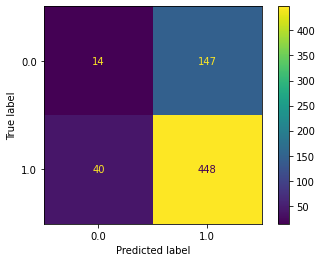

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_nol, y_true=valid_y)

accumlated_loan_given

In [ ]:
valid_algy = valid_xs.copy()
valid_algy[ 'accumlated_loan_given'] = np.random.permutation(valid_algy[ 'accumlated_loan_given'])
m.score(valid_algy, valid_y)

0.711864406779661

In [ ]:
feat_imp[ 'accumlated_loan_given'] = std_score - m.score(valid_algy,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


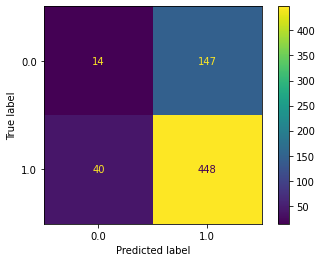

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_algy, y_true=valid_y)

accumlated_timediff


In [ ]:
valid_aty = valid_xs.copy()
valid_aty[ 'accumlated_timediff'] = np.random.permutation(valid_aty[ 'accumlated_timediff'])
m.score(valid_aty, valid_y)

0.7180277349768875

In [ ]:
feat_imp[ 'accumlated_timediff'] = std_score - m.score(valid_aty,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.006163,0,0,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


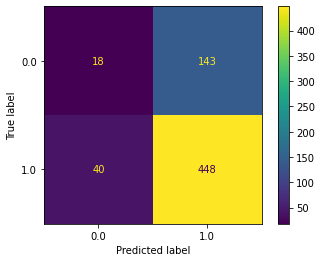

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_aty, y_true=valid_y)

time-to-payoff

In [ ]:
valid_fr = valid_xs.copy()
valid_fr['time-to-payoff'] = np.random.permutation(valid_fr['time-to-payoff'])
m.score(valid_fr, valid_y)

0.7087827426810478

In [ ]:
feat_imp['time-to-payoff'] = std_score - m.score(valid_fr,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.006163,0,0.003082,0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


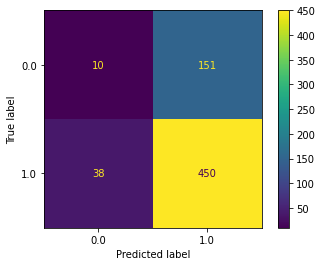

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_fr , y_true=valid_y)

accumulated_money_won

In [ ]:
valid_ttp = valid_xs.copy()
valid_ttp['accumulated_money_won'] = np.random.permutation(valid_ttp['accumulated_money_won'])
m.score(valid_ttp, valid_y)

0.711864406779661

In [ ]:
feat_imp['accumulated_money_won'] = std_score - m.score(valid_ttp,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.006163,0,0.003082,0.0,0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


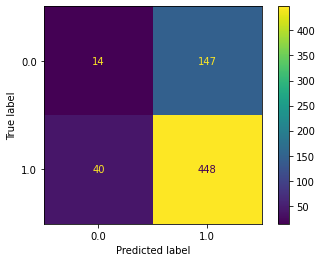

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_ttp , y_true=valid_y)


is_late_for_firstpay

In [ ]:
valid_amw = valid_xs.copy()
valid_amw['is_late_for_firstpay'] = np.random.permutation(valid_amw['is_late_for_firstpay'])
m.score(valid_ttp, valid_y)

0.711864406779661

In [ ]:
feat_imp['is_late_for_firstpay'] = std_score - m.score(valid_amw,valid_y)
feat_imp.head()

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.006163,0,0.003082,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


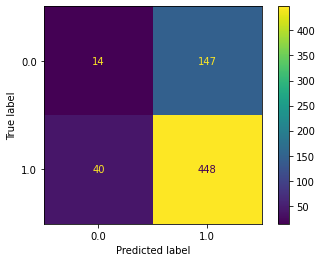

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_amw , y_true=valid_y)

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 60
feat_imp

,bank_branch_clients,loannumber,loanamount,totaldue,termdays,referred,realage,TipoInteresAhora,bank_account_Current,bank_account_Other,...,employment_status_client_Unknown,number_of_Loans,accumlated_loan_given,accumlated_timediff,first-repay,time-to-payoff,accumulated_money_won,is_late_for_firstpay,level_of_education_clients_Post-Graduate,level_of_education_clients_Secondary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.006163,0,0.003082,0.0,0.0,0.0,0.0


**simplify model**

In [ ]:
train_simple = train_xs.copy()
valid_simple = valid_xs.copy()
if 'bank_branch_clients' in train_simple:
  train_simple = train_simple.drop(['bank_branch_clients', 'loannumber', 'referred', 'TipoInteresAhora', 'bank_account_Current', 'bank_account_Other', 'bank_account_Savings', 'level_of_education_clients_Graduate', 'level_of_education_clients_Post-Graduate', 'level_of_education_clients_Primary', 'level_of_education_clients_Secondary', 'level_of_education_clients_Unknown', 'bank_name_client_Access Bank', 'bank_name_client_Diamond Bank', 'bank_name_client_EcoBank', 'bank_name_client_FCMB', 'bank_name_client_Fidelity Bank', 'bank_name_client_First Bank', 'bank_name_client_GT Bank', 'bank_name_client_Heritage Bank', 'bank_name_client_Keystone Bank','bank_name_client_Skye Bank', 'bank_name_client_Stanbic IBTC', 'bank_name_client_Standard Chartered', 'bank_name_client_Sterling Bank', 'bank_name_client_UBA', 'bank_name_client_Union Bank', 'bank_name_client_Unity Bank', 'bank_name_client_Wema Bank', 'bank_name_client_Zenith Bank','employment_status_client_Contract', 'employment_status_client_Permanent', 'employment_status_client_Retired', 'employment_status_client_Self-Employed', 'employment_status_client_Student', 'employment_status_client_Unemployed', 'employment_status_client_Unknown', 'is_late_for_firstpay', 'exceeds_loan_term_days', 'TipoInteres'], axis=1)
  valid_simple = valid_simple.drop(['bank_branch_clients', 'loannumber','referred', 'TipoInteresAhora', 'bank_account_Current', 'bank_account_Other', 'bank_account_Savings', 'level_of_education_clients_Graduate', 'level_of_education_clients_Post-Graduate', 'level_of_education_clients_Primary', 'level_of_education_clients_Secondary', 'level_of_education_clients_Unknown', 'bank_name_client_Access Bank', 'bank_name_client_Diamond Bank', 'bank_name_client_EcoBank', 'bank_name_client_FCMB', 'bank_name_client_Fidelity Bank', 'bank_name_client_First Bank', 'bank_name_client_GT Bank', 'bank_name_client_Heritage Bank', 'bank_name_client_Keystone Bank','bank_name_client_Skye Bank', 'bank_name_client_Stanbic IBTC', 'bank_name_client_Standard Chartered', 'bank_name_client_Sterling Bank', 'bank_name_client_UBA', 'bank_name_client_Union Bank', 'bank_name_client_Unity Bank', 'bank_name_client_Wema Bank', 'bank_name_client_Zenith Bank','employment_status_client_Contract', 'employment_status_client_Permanent', 'employment_status_client_Retired', 'employment_status_client_Self-Employed', 'employment_status_client_Student', 'employment_status_client_Unemployed', 'employment_status_client_Unknown', 'is_late_for_firstpay', 'exceeds_loan_term_days', 'TipoInteres'], axis=1)
valid_simple.head

KeyError: ignored

In [ ]:
m = KNeighborsClassifier()
m = m.fit(train_simple, train_y)

In [ ]:
m.score(valid_simple, valid_y)

0.9249448123620309

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


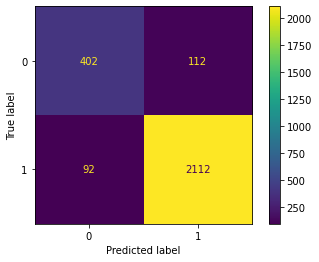

In [ ]:
plot_confusion_matrix(estimator=m, X=valid_simple, y_true=valid_y)